# Exploratory Data Analysis

In this notebook, I will take an initial look at the data and some of its trends.

In [293]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from matplotlib import pyplot as plt

In [294]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)

## Loading and Examining Non-Numeric Variables

In [295]:
# load data
df = pd.read_csv('./dataset-stroke.csv').drop(columns=['Unnamed: 0', 'id'])

In [296]:
# quick look
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0
1,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.7,formerly smoked,1
2,Female,69.0,0,0,Yes,Private,Rural,103.73,34.7,never smoked,0
3,Male,60.0,0,0,Yes,Self-employed,Urban,227.23,40.0,formerly smoked,0
4,Female,65.0,0,0,Yes,Govt_job,Urban,82.72,29.8,smokes,0


In [297]:
df.work_type.unique()

array(['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked'],
      dtype=object)

In [298]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [299]:
df.smoking_status.unique()

array(['never smoked', 'formerly smoked', 'smokes', 'Unknown'],
      dtype=object)

## Baseline Histograms

In [300]:
# get dummies of the categoricals for the sake of visualization 
df = pd.concat([df, pd.get_dummies(df.smoking_status, prefix="Smoker")], axis=1)
df = pd.concat([df, pd.get_dummies(df.Residence_type, prefix="Residence")], axis=1)
df = pd.concat([df, pd.get_dummies(df.work_type, prefix="Work")], axis=1)

In [301]:
# again just temporary for this visualization 
df['gender'] = OneHotEncoder().fit_transform(df.gender.to_numpy().reshape(-1, 1)).toarray()
df['ever_married'] = OneHotEncoder().fit_transform(df.ever_married.to_numpy().reshape(-1, 1)).toarray()

In [302]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,Smoker_formerly smoked,Smoker_never smoked,Smoker_smokes,Residence_Rural,Residence_Urban,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children
0,1.0,24.0,0,0,0.0,Private,Urban,85.55,63.3,never smoked,...,0,1,0,0,1,0,0,1,0,0
1,0.0,57.0,1,0,0.0,Govt_job,Urban,78.92,27.7,formerly smoked,...,1,0,0,0,1,1,0,0,0,0
2,1.0,69.0,0,0,0.0,Private,Rural,103.73,34.7,never smoked,...,0,1,0,1,0,0,0,1,0,0
3,0.0,60.0,0,0,0.0,Self-employed,Urban,227.23,40.0,formerly smoked,...,1,0,0,0,1,0,0,0,1,0
4,1.0,65.0,0,0,0.0,Govt_job,Urban,82.72,29.8,smokes,...,0,0,1,0,1,1,0,0,0,0


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>],
       [<AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>],
       [<AxesSubplot:title={'center':'Smoker_Unknown'}>,
        <AxesSubplot:title={'center':'Smoker_formerly smoked'}>,
        <AxesSubplot:title={'center':'Smoker_never smoked'}>,
        <AxesSubplot:title={'center':'Smoker_smokes'}>],
       [<AxesSubplot:title={'center':'Residence_Rural'}>,
        <AxesSubplot:title={'center':'Residence_Urban'}>,
        <AxesSubplot:title={'center':'Work_Govt_job'}>,
        <AxesSubplot:title={'center':'Work_Never_worked'}>],
       [<AxesSubplot:title={'center':'Work_Private'}>,
        <AxesSubplot:title={'center':'Work_Self-emplo

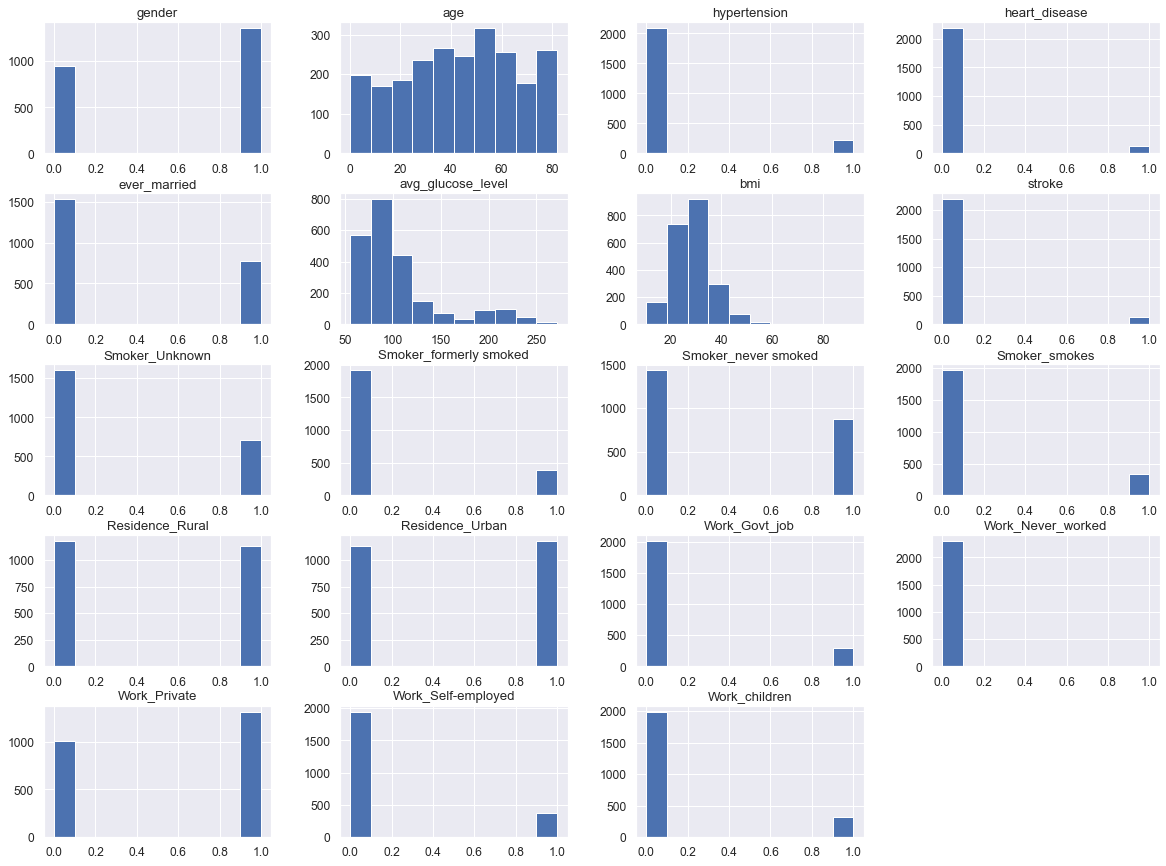

In [303]:
df.hist(figsize=(20,15))

It seems reasonable to expect that older people will have higher rates of stroke. Additionally, the average glucose level/bmi seem likely to be correlated.

## Examining Distribution of Age

<AxesSubplot:xlabel='age'>

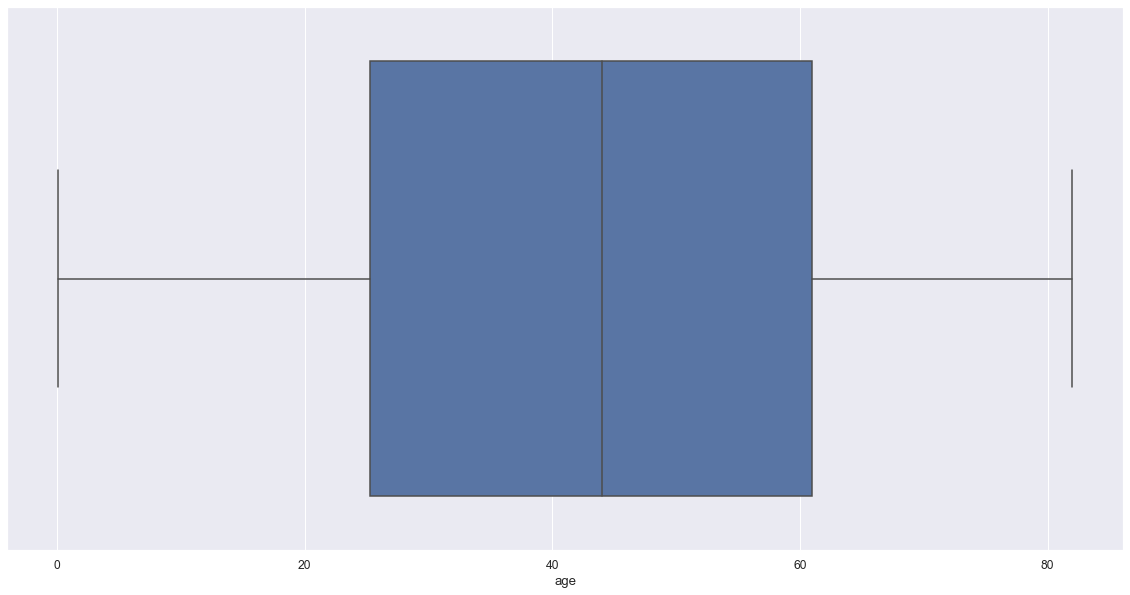

In [304]:
sns.boxplot(data=df, x="age")

No significant skew, but mostly distributed about the middle age range.

## Distribution of age among stroke/no-stroke

<AxesSubplot:xlabel='stroke', ylabel='age'>

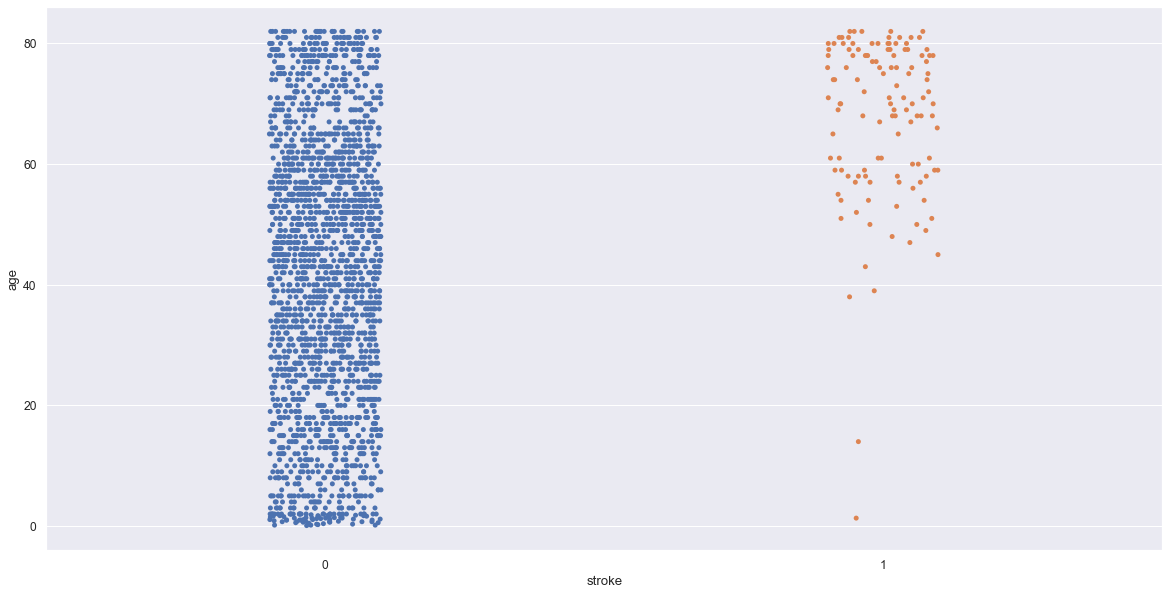

In [305]:
sns.stripplot(data=df, y="age", x="stroke")

## Correlation Matrix

In [306]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Smoker_Unknown,Smoker_formerly smoked,Smoker_never smoked,Smoker_smokes,Residence_Rural,Residence_Urban,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children
gender,1.000000,0.040218,-0.033340,-0.077962,-0.031403,-0.078714,0.014736,0.004822,-0.041566,-0.059009,0.095069,-0.013517,-0.004499,0.004499,0.051652,-0.000731,0.015066,0.019965,-0.092536
age,0.040218,1.000000,0.274375,0.272935,-0.674485,0.216190,0.335585,0.253765,-0.373218,0.228075,0.124933,0.072312,-0.011570,0.011570,0.128000,-0.084969,0.149420,0.303227,-0.641139
hypertension,-0.033340,0.274375,1.000000,0.134496,-0.183802,0.148561,0.164191,0.158750,-0.140248,0.078261,0.038465,0.046702,0.016490,-0.016490,0.022880,-0.023621,0.005117,0.101041,-0.131556
heart_disease,-0.077962,0.272935,0.134496,1.000000,-0.107003,0.161839,0.034359,0.147837,-0.063977,0.084033,-0.045678,0.056614,0.000763,-0.000763,0.004239,-0.017357,-0.001329,0.087413,-0.091163
ever_married,-0.031403,-0.674485,-0.183802,-0.107003,1.000000,-0.123973,-0.336273,-0.119487,0.335846,-0.172242,-0.110970,-0.102098,-0.015695,0.015695,-0.132783,0.101208,-0.193318,-0.169555,0.563661
avg_glucose_level,-0.078714,0.216190,0.148561,0.161839,-0.123973,1.000000,0.158766,0.157516,-0.074290,0.062581,0.010316,0.016089,-0.003760,0.003760,0.024128,-0.011082,0.018187,0.038601,-0.087950
bmi,0.014736,0.335585,0.164191,0.034359,-0.336273,0.158766,1.000000,0.043944,-0.277022,0.118983,0.108984,0.085969,0.018630,-0.018630,0.079426,-0.037983,0.240387,0.039787,-0.452187
stroke,0.004822,0.253765,0.158750,0.147837,-0.119487,0.157516,0.043944,1.000000,-0.055624,0.073373,-0.016392,0.016935,-0.022604,0.022604,0.007284,-0.017064,0.015307,0.055194,-0.083857
Smoker_Unknown,-0.041566,-0.373218,-0.140248,-0.063977,0.335846,-0.074290,-0.277022,-0.055624,1.000000,-0.300084,-0.516578,-0.274861,0.006045,-0.006045,-0.067163,0.004416,-0.243171,-0.094638,0.512246
Smoker_formerly smoked,-0.059009,0.228075,0.078261,0.084033,-0.172242,0.062581,0.118983,0.073373,-0.300084,1.000000,-0.352910,-0.187777,-0.010963,0.010963,-0.002401,-0.032719,0.045262,0.100683,-0.162266


<AxesSubplot:>

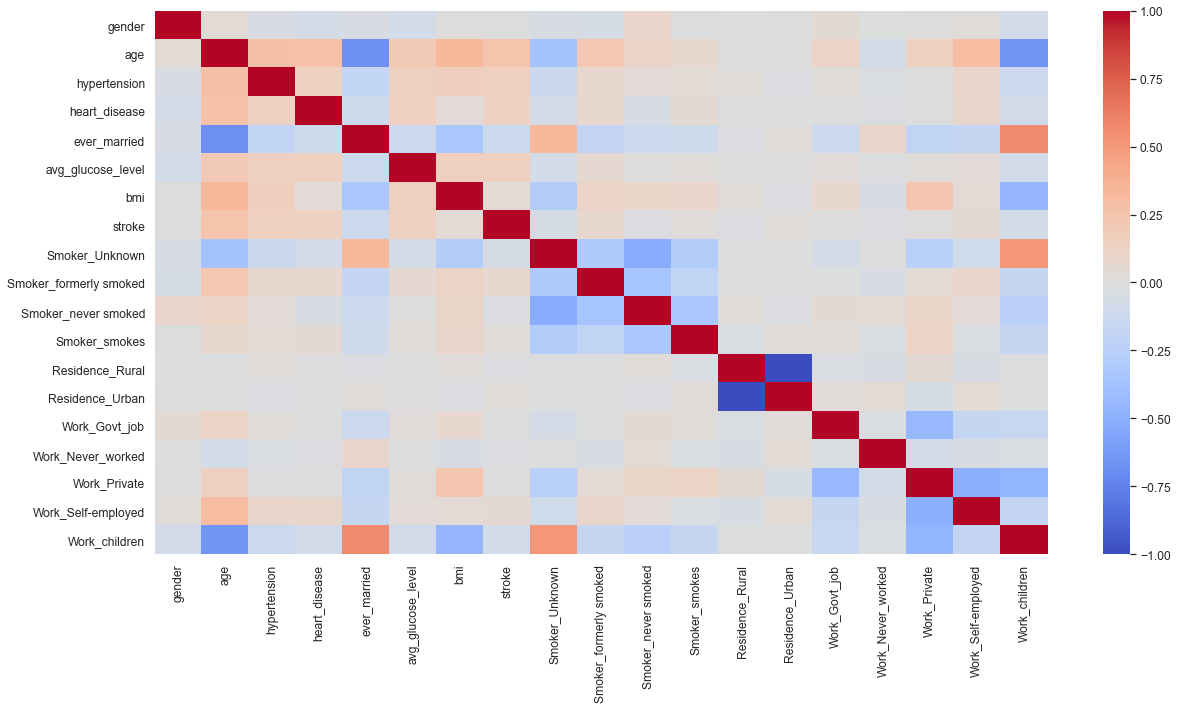

In [307]:
sns.heatmap(data = df.corr(), cmap = "coolwarm")

## 

<AxesSubplot:xlabel='stroke', ylabel='age'>

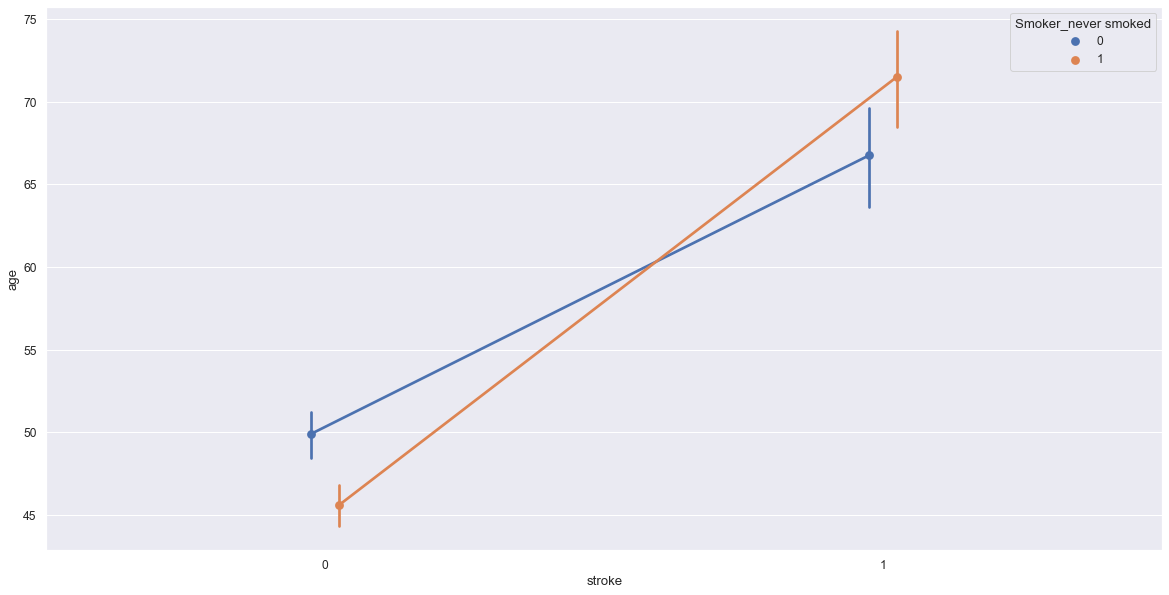

In [344]:
sns.pointplot(data=df[df.smoking_status != "Unknown"], x="stroke", y="age", hue="Smoker_never smoked", dodge=True)

Above is a pointplot that examines the participants whose smoking history we know. Point plots essentially just show the expected value and confidence interval. This plot shows us that those who have never smoked, but have had a stroke tend to be older than those that have smoked and had a stroke. 

Perhaps less interesting, this also shows us that younger people are less likely to have a stroke.